## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('./final_19122022/final.csv')
df

,location,title,company,salary,summary,job_url
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,NaN,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),NaN,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...
2,Kuala Lumpur,Data Scientist,RHB Banking Group,NaN,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,NaN,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,NaN,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...
...,...,...,...,...,...,...
3685,Kuala Lumpur,Manager ICS Technical Controls Testing,Standard Chartered,NaN,Job: Operations\nPrimary Location: Asia-Malays...,https://www.jobstreet.com.my/en/job/manager-ic...
3686,Selangor,Senior System Engineer,YONGPENG SOLUTIONS SDN. BHD.,NaN,Description\nJob Description and Responsibilit...,https://www.jobstreet.com.my/en/job/senior-sys...
3687,Kuala Lumpur,Junior Service Engineer,Baker Hughes,NaN,Are you a Service Engineer looking for an inte...,https://www.jobstreet.com.my/en/job/junior-ser...
3688,Malaysia,"Senior Manager, Operations Excellence-Kuala Lu...",Lazada,NaN,Job Description\nLazada Malaysia Sales Operati...,https://www.jobstreet.com.my/en/job/senior-man...


### Replacing null value in salary with 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  3690 non-null   object 
 1   title     3690 non-null   object 
 2   company   3690 non-null   object 
 3   salary    0 non-null      float64
 4   summary   3690 non-null   object 
 5   job_url   3690 non-null   object 
dtypes: float64(1), object(5)
memory usage: 173.1+ KB


In [4]:
df.salary.isnull().sum()

3690

In [6]:
new_df = df.fillna(0)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  3690 non-null   object 
 1   title     3690 non-null   object 
 2   company   3690 non-null   object 
 3   salary    3690 non-null   float64
 4   summary   3690 non-null   object 
 5   job_url   3690 non-null   object 
dtypes: float64(1), object(5)
memory usage: 173.1+ KB


### Company with most job intake

In [8]:
df_val = new_df.company.value_counts()
df_val.head(10)

AirAsia                                          85
CIMB Niaga                                       70
TRUST RECRUIT PTE. LTD.                          66
Western Digital                                  40
Ambition Group Malaysia Sdn Bhd                  38
Company Confidential                             32
Michael Page International (Malaysia) Sdn Bhd    28
RK Recruitment Pte. Ltd.                         24
Vision Technology Consulting                     22
RHB Bank                                         21
Name: company, dtype: int64

In [9]:
type(df_val)

pandas.core.series.Series

In [10]:
companies_df = df_val.to_frame()
# companies_df = companies_df.rename(columns = {'index:'companies','company:'jobs'})
# companies_df = companies_df.set_index()
companies_df = companies_df.reset_index()

In [11]:
companies_df = companies_df.rename(columns = {'index':'companies','company':'jobs'})

In [23]:
companies_top20 =companies_df.head(20)
companies_top20.to_csv('./companies_top20a.csv')

In [18]:
import plotly.express as px

fig = px.bar(companies_top20, x='jobs', y='companies', text_auto='.2s',color_discrete_sequence=px.colors.qualitative.Set3, orientation='h',
             title="Companies with the most jobs opening")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [16]:
fig = px.bar(companies_df, x='jobs', y='companies', text_auto='.2s',color_discrete_sequence=px.colors.qualitative.Set3, orientation='h',
             title="Companies with the most jobs opening")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [37]:
companies_bottom = companies_df.tail(20)
companies_bottom.to_csv('./companies_bottom.csv')

In [38]:
fig = px.bar(companies_bottom, x='jobs', y='companies', text_auto='.2s',color_discrete_sequence=px.colors.qualitative.Set1, orientation='h',
             title="Companies with the least jobs opening")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### Salary count

### Location

In [65]:
location_df = new_df.location.value_counts()
location_df = location_df.to_frame()
location_df = location_df.reset_index()
location_df = location_df.rename(columns={'index':'locations', 'location':'job_openings'})
location_df = location_df. drop_duplicates()
location_df.to_csv('./location.csv')
location_df


,locations,job_openings
0,Kuala Lumpur,1443
1,Petaling Jaya,322
2,Selangor,263
3,Penang,160
4,Bayan Lepas,120
...,...,...
122,"Kuala Lumpur, Bayan Lepas",2
123,"Selangor - Others, Kuala Lumpur, Negeri Sembil...",2
124,"Johor Bahru, Shah Alam/Subang",2
125,"Klang/Port Klang, Kuala Lumpur",2


In [66]:
location_top = location_df.head(20)
location_bottom = location_df.tail(10)

In [68]:
fig = px.bar(location_top, x='job_openings', y='locations', text='job_openings',
             color_discrete_sequence=px.colors.qualitative.Dark2, orientation='h',
             title="Top 20 locations with the most job openings")
#fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [69]:
fig = px.bar(location_top, x='job_openings', y='locations', text='job_openings',
             color_discrete_sequence=px.colors.qualitative.Dark2, orientation='h',
             title="Top 20 locations with the most job openings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [59]:
fig = px.bar(location_top, x='job_openings', y='locations', text_auto='.2s',color_discrete_sequence=px.colors.qualitative.Dark2[2], orientation='h',
             title="Top 20 locations with the most job openings")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of bar.marker
        Received value: 'r'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to bar.marker.colorscale
      - A list or array of any of the above

In [49]:
import plotly.express as px

fig = px.pie(location_top, names="locations", title= 'Distribution of Job Openings by location',color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

### Skills

In [10]:
# Checking for DS skills in summary
import pickle

with open('DS_skills.pickle', 'rb') as skill:
    skills = pickle.load(skill)
print(skills)

['a.i', 'agile', 'ai', 'algorithms', 'analysis', 'automation', 'aws', 'azure', 'c+', 'c++', 'data analysis', 'data mining', 'data wrangling', 'deep learning', 'deployment', 'dl', 'etl', 'forecast', 'forecasting', 'hive', 'machine learning', 'mathematics', 'ml', 'modelling', 'mysql', 'natural language', 'nlp', 'nosql', 'numpy', 'pandas', 'phd', 'power b.i', 'powerbi', 'python', 'regression', 'sas', 'spark', 'sql', 'statistics', 'tableau', 'time series', 'visualization']


In [11]:
# import random
# def ds_skill(summary):
#     skill_list = []
    
#     for word in summary.split():
#         clean = word.lower().strip(' ,.:!?')
#         if clean in skills:
#             skill_list.append(clean)
#         elif clean not in skills:
#             clean1 = random.choices(skills,k=3)
#             skill_list.append(clean1)
#     skill_list = list(dict.fromkeys(skill_list))
#     return skill_list
                           

In [12]:
import random
def ds_skill(summary):
    skill_list = []
    
    for word in summary.split():
        clean = word.lower().strip(' ,.:!?')
        if clean in skills:
            skill_list.append(clean)
        elif clean not in skills:
            clean1 = random.choices(skills,k=3)
            skill_list.extend(clean1)
    skill_list = list(dict.fromkeys(skill_list))
    return skill_list


In [13]:
new_df['required_skills'] = new_df.summary.apply(ds_skill)
new_df.head(10)

,location,title,company,salary,summary,job_url,required_skills
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,0.0,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...,"[agile, machine learning, data mining, ml, dep..."
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),0.0,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...,"[etl, forecasting, algorithms, sql, data wrang..."
2,Kuala Lumpur,Data Scientist,RHB Banking Group,0.0,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...,"[deployment, forecast, azure, forecasting, aut..."
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,0.0,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...,"[powerbi, agile, azure, phd, deployment, c++, ..."
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,0.0,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...,"[tableau, mysql, analysis, data mining, visual..."
5,Kuala Lumpur,Business Intelligence Analyst,Ria Financial,0.0,"As a Business Intelligence Analyst, you will b...",https://www.jobstreet.com.my/en/job/business-i...,"[ai, spark, numpy, c+, regression, data wrangl..."
6,Muar,Data Science Project Manager,STMicroelectronics Sdn Bhd,0.0,Responsibilities:\nDiscuss with technical doma...,https://www.jobstreet.com.my/en/job/data-scien...,"[python, agile, deep learning, pandas, time se..."
7,East - Others,Cloud Data Engineer,Pearson Frank International (A divison of Fran...,0.0,Responsibilities:\n- Run Data Ingestion and Ad...,https://www.jobstreet.com.my/en/job/cloud-data...,"[mathematics, data mining, forecasting, etl, s..."
8,Kuala Lumpur,Regional Data Analyst,LIVEMED SDN. BHD.,0.0,About this role\nWe are looking for an experie...,https://www.jobstreet.com.my/en/job/regional-d...,"[visualization, data mining, sas, python, math..."
9,Makati City,"Machine Learning Scientist (SQL, Python, R)",Avantice Corporation,0.0,Job Description: \nThis role is open to Machin...,https://www.jobstreet.com.my/en/job/machine-le...,"[dl, tableau, mathematics, numpy, phd, nosql, ..."


### remote work

In [14]:
# def ds_remote(summary):
#     r_list = []
#     remote1 = ['remote']
#     remote2 = [ 'hybrid',  'onsite']
    
#     for word in summary.split():
#         clean = word.lower().strip(' ,.:!?')
#         if clean in remote1:
#             r_list.append(clean)
#         elif clean not in remote2:
#             clean1 = random.choices(remote2)
#             r_list.extend(clean1)
#     r_list = list(dict.fromkeys(r_list))
#     return r_list


                

In [15]:
# new_df['work flexibility'] = new_df.summary.apply(ds_remote)
# new_df.head(10)

In [71]:
import re

import pandas as pd

new_df = new_df.assign(is_remote=False)


for i in range(1, len(new_df)):
    for series in ['summary', 'location', 'title']:
        if new_df.at[i, 'is_remote'] != True:
            if re.search("remote", new_df.at[i, series].lower()):
                new_df.at[i, 'is_remote'] = True

new_df.groupby('is_remote').size()





is_remote
False    3469
True      221
dtype: int64

In [72]:
new_df

,location,title,company,salary,summary,job_url,is_remote
0,Bentong,Data Scientist - Manager,Genting Malaysia Berhad,0.0,Operate machine-learning models to perform dat...,https://www.jobstreet.com.my/en/job/data-scien...,False
1,Kuala Lumpur,Senior Data Scientist - Information Retrieval ...,SEEK Asia (JobStreet),0.0,The Role\nThe Senior Data Scientist – Informat...,https://www.jobstreet.com.my/en/job/senior-dat...,False
2,Kuala Lumpur,Data Scientist,RHB Banking Group,0.0,Responsibilities\nAssess applicability of adva...,https://www.jobstreet.com.my/en/job/data-scien...,False
3,Kuala Lumpur,DATA SCIENCE &BACK END SYSTEM ENGINEERING,Digital Silhouette Sdn Bhd,0.0,1. Data Mining &Analysis\n- Requires...,https://www.jobstreet.com.my/en/job/data-scien...,False
4,Bayan Lepas,Business Intelligent Analyst (Data Scientist),Keysight Technologies Malaysia Sdn. Bhd.,0.0,We are looking for a Data Scientist to analyze...,https://www.jobstreet.com.my/en/job/business-i...,False
...,...,...,...,...,...,...,...
3685,Kuala Lumpur,Manager ICS Technical Controls Testing,Standard Chartered,0.0,Job: Operations\nPrimary Location: Asia-Malays...,https://www.jobstreet.com.my/en/job/manager-ic...,False
3686,Selangor,Senior System Engineer,YONGPENG SOLUTIONS SDN. BHD.,0.0,Description\nJob Description and Responsibilit...,https://www.jobstreet.com.my/en/job/senior-sys...,False
3687,Kuala Lumpur,Junior Service Engineer,Baker Hughes,0.0,Are you a Service Engineer looking for an inte...,https://www.jobstreet.com.my/en/job/junior-ser...,False
3688,Malaysia,"Senior Manager, Operations Excellence-Kuala Lu...",Lazada,0.0,Job Description\nLazada Malaysia Sales Operati...,https://www.jobstreet.com.my/en/job/senior-man...,False


In [163]:
wordcloud_df = new_df.to_csv('./final_dataset/wordcloud_df.csv')

In [73]:
# import random
# def ds_remote(summary):
#     r_list = []
#     remote_list= ['hybrid', 'onsite']
    
#     for word in summary.split():
#         clean = word.lower().strip(' ,.:!?')
#         if clean not in remote_list:
#             clean1 = random.choices(remote_list, k=1)
#             r_list.extend(clean1)
#         else:
#             r_list.append(clean)
            
#     r_list = list(dict.fromkeys(r_list))
#     return r_list


### Location with the most onsite or hybrid job

In [94]:
remote_job_df = new_df[['location','is_remote']].value_counts()
remote_job_df.head(10)

location          is_remote
Kuala Lumpur      False        1345
Petaling Jaya     False         304
Selangor          False         257
Penang            False         154
Bayan Lepas       False         116
Malaysia          False         109
Kuala Lumpur      True           98
Cyberjaya         False          87
George Town       False          76
Shah Alam/Subang  False          76
dtype: int64

In [95]:
remote_job_df.to_frame()

,,0
location,is_remote,
Kuala Lumpur,False,1345
Petaling Jaya,False,304
Selangor,False,257
Penang,False,154
Bayan Lepas,False,116
...,...,...
"Klang/Port Klang, Kuala Lumpur",False,2
Kajang/Bangi/Serdang,True,2
Jurong West,False,2


In [97]:
remote_job_df = remote_job_df.to_frame()
remote_job_df = remote_job_df.reset_index()
remote_job_df = remote_job_df.rename(columns={'index':'locations', 'is_remote':'is_remote','data':'num_is_remote'})
remote_job_df = remote_job_df. drop_duplicates()
#remote_job_df.to_csv('./is_remote.csv')


In [109]:
remote_job_df = remote_job_df.rename(columns={'locations':'locations', 'is_remote':'is_remote',0:'num_is_remote'})
#remote_job_df.to_csv('./is_remote.csv')
#remote_job_df
remote_job_df

,location,is_remote,num_is_remote
0,Kuala Lumpur,False,1345
1,Petaling Jaya,False,304
2,Selangor,False,257
3,Penang,False,154
4,Bayan Lepas,False,116
...,...,...,...
143,"Klang/Port Klang, Kuala Lumpur",False,2
144,Kajang/Bangi/Serdang,True,2
145,Jurong West,False,2
146,"Johor, Selangor",True,2


In [111]:
remote_job_df = remote_job_df.drop([5],axis=0,inplace=True)
remote_job_df

KeyError: '[5] not found in axis'

In [113]:
remote_job_df.reset_index()

,index,location,is_remote,num_is_remote
0,0,Kuala Lumpur,False,1345
1,1,Petaling Jaya,False,304
2,2,Selangor,False,257
3,3,Penang,False,154
4,4,Bayan Lepas,False,116
...,...,...,...,...
142,143,"Klang/Port Klang, Kuala Lumpur",False,2
143,144,Kajang/Bangi/Serdang,True,2
144,145,Jurong West,False,2
145,146,"Johor, Selangor",True,2


In [116]:
remote_job_df = remote_job_df.drop([10],axis=0,inplace=True)

KeyError: '[10] not found in axis'

In [117]:
remote_job_df.reset_index()

,index,location,is_remote,num_is_remote
0,0,Kuala Lumpur,False,1345
1,1,Petaling Jaya,False,304
2,2,Selangor,False,257
3,3,Penang,False,154
4,4,Bayan Lepas,False,116
...,...,...,...,...
141,143,"Klang/Port Klang, Kuala Lumpur",False,2
142,144,Kajang/Bangi/Serdang,True,2
143,145,Jurong West,False,2
144,146,"Johor, Selangor",True,2


In [119]:
remote_job_df.to_csv('./final_dataset/cleaned_is_remote')

In [164]:
remote_job_df.loc[remote_job_df.location == 'Penang', 'location'] = 'Penang_mainland'
remote_job_df.to_csv('./final_dataset/cleaned_is_remote2.csv')

In [122]:
not_remote = remote_job_df[remote_job_df['is_remote']==False]
not_remote

,location,is_remote,num_is_remote
0,Kuala Lumpur,False,1345
1,Petaling Jaya,False,304
2,Selangor,False,257
3,Penang,False,154
4,Bayan Lepas,False,116
...,...,...,...
141,"Kuala Lumpur, Bayan Lepas",False,2
142,Kota Tinggi,False,2
143,"Klang/Port Klang, Kuala Lumpur",False,2
145,Jurong West,False,2


In [140]:
is_remote = remote_job_df[remote_job_df['is_remote']==True]


/tmp/ipykernel_12907/2353418331.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
import plotly.express as px

# Create a histogram for each value of the 'location' column

df = remote_job_df.head(10)
fig = px.histogram(df, y="location", x='num_is_remote',color="is_remote", orientation='h')
fig.show()


In [139]:
df = remote_job_df.tail(10)
fig = px.histogram(df, y="location", x='num_is_remote',color="is_remote", orientation='h')
fig.show()

In [105]:

#loc = new_df[new_df['is_remote'] == "False"].sort_values('location',ascending=False).sum()
new = new_df[new_df['is_remote'] == False]
new_loc = new.groupby('location').value_counts()
new_loc

location                         title                                                                                     company                                             salary  summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Location with the most job opening

In [21]:
location_df = new_df['location'].value_counts()
location_df.head(10)

Kuala Lumpur        1443
Petaling Jaya        322
Selangor             263
Penang               160
Bayan Lepas          120
Malaysia             115
Cyberjaya             99
Shah Alam/Subang      86
George Town           82
Singapore             72
Name: location, dtype: int64

### Location with the least job opening

In [22]:
location_df.tail(10)



National Capital Reg                                         2
Jurong West                                                  2
Japan                                                        2
Johor, Perak, Penang, Selangor, Sarawak, Sabah, Melaka, ,    2
Kuala Lumpur, Hong Kong                                      2
Kuala Lumpur, Bayan Lepas                                    2
Selangor - Others, Kuala Lumpur, Negeri Sembilan, Perak      2
Johor Bahru, Shah Alam/Subang                                2
Klang/Port Klang, Kuala Lumpur                               2
Kuantan                                                      2
Name: location, dtype: int64

### Word clouds

In [23]:
#pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [154]:
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 17.7 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached regex-2022.10.31-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [155]:
! pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)


In [156]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/subaash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
words = []
for phrase in new_df.summary.values:
    for word in phrase.split():
        words.append(word)
word_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

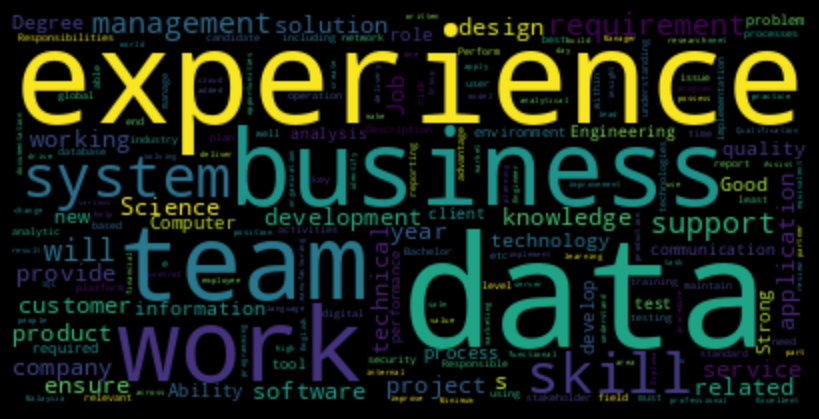

In [158]:
wordcloud = WordCloud(background_color='black',
                      collocations=False, contour_width=2,
                     ).generate(word_list)

plt.figure(figsize=(8, 7), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0);

In [160]:
import pickle

with open('DS_skills.pickle', 'rb') as handle:
    ds_skills = pickle.load(handle)

print((ds_skills))

['a.i', 'agile', 'ai', 'algorithms', 'analysis', 'automation', 'aws', 'azure', 'c+', 'c++', 'data analysis', 'data mining', 'data wrangling', 'deep learning', 'deployment', 'dl', 'etl', 'forecast', 'forecasting', 'hive', 'machine learning', 'mathematics', 'ml', 'modelling', 'mysql', 'natural language', 'nlp', 'nosql', 'numpy', 'pandas', 'phd', 'power b.i', 'powerbi', 'python', 'regression', 'sas', 'spark', 'sql', 'statistics', 'tableau', 'time series', 'visualization']


In [161]:
def skill_extractor(summary):

    test_list = []

    for word in summary.split():

        clean_word = word.lower().strip(' ,.!?')

        if clean_word in ds_skills:
            test_list.append(clean_word)

    test_list = list(dict.fromkeys(test_list))
    return test_list

In [162]:
words = []
for skills in new_df.required_skills.values:
    for word in skills:
        words.append(word)
skill_match_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='black',
                      collocations=False, contour_width=2,
                     ).generate(skill_match_list)

plt.figure(figsize=(8, 7), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off');

AttributeError: 'DataFrame' object has no attribute 'required_skills'

In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Bubble map

In [35]:
# !pip install geopandas
# !pip install geoplot
!conda install -c conda-forge geoplot -y

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::spyder==5.3.3=py39h06a4308_0
  - defaults/noarch::pyls-spyder==0.4.0=pyhd3eb1b0_0
  - defaults/noarch::flake8==4.0.1=pyhd3eb1b0_1
  - defaults/linux-64::python-lsp-server==1.5.0=py39h06a4308_0
  - defaults/linux-64::markdown==3.3.4=py39h06a4308_0
  - defaults/noarch::importlib_metadata==4.11.3=hd3eb1b0_0
  - defaults/linux-64::numpydoc==1.4.0=py39h06a4308_0
  - defaults/linux-64::anaconda==2022.10=py39_0
  - defaults/linux-64::python-lsp-black==1.2.1=py39h06a4308_0
  - defaults/linux-64::panel==0.13.1=py39h06a4308_0
  - defaults/linux-64::keyring==23.4.0=py39h06a4308_0
  - defaults/linux-64::sphinx==5.0.2=py39h06a4308_0
  - defaults/linux-64::hvplot==0.8.0=py39h06a4308_0
  - defaults/linux-64::holoviews==1.15.0=py39h06a4308_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: fail

NameError: name 'y' is not defined

In [27]:
import geopandas as gpd

In [28]:
import geoplot as gplt

ModuleNotFoundError: No module named 'geoplot'